## Installing required libraries

In [26]:
#!pip install scikit-learn
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import numpy as np

## Reading the merged dataframe

In [2]:
df=pd.read_csv("df_admissions.csv")
df

,Unnamed: 0,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,...,race,edregtime,edouttime,hospital_expire_flag,subject_id_hadm_id,long_title,icd_code,first_careunit,last_careunit,los
0,0,10000100,58594204243,2019-06-26 13:20:00,2019-07-05 12:47:00,NaN,NaN,NaN,PHYSIC OFC/CLINIC,HOME SELF CARE,...,African American or Black,NaN,NaN,0,10000100_58594204243,Abscess of liver,K75.0,NaN,NaN,NaN
1,1,10000562,60707883031,2016-06-02 09:24:00,2016-06-04 15:11:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,...,African American or Black,NaN,NaN,0,10000562_60707883031,Long term (current) use of insulin,Z79.4,NaN,NaN,NaN
2,2,10000671,67252991505,2019-05-14 20:20:00,2019-05-15 13:09:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,...,African American or Black,NaN,NaN,0,10000671_67252991505,Epigastric pain,R10.13,NaN,NaN,NaN
3,3,10000683,29770490036,2015-05-12 18:28:00,2015-05-17 15:55:00,NaN,NaN,NaN,TRANSFER FROM HOSP,HOME SELF CARE,...,Caucasian or White,NaN,NaN,0,10000683_29770490036,Not Recorded,272.4,5E ICU EUH,5E ICU EUH,0.207338
4,4,10000683,21514546148,2015-05-28 14:04:00,2015-06-03 19:03:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,...,Caucasian or White,NaN,NaN,0,10000683_21514546148,Not Recorded,305.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972842,972842,99999731,37382428249,2009-11-24 12:50:00,2009-11-25 18:50:00,NaN,NaN,NaN,Not Recorded,HOME SELF CARE,...,African American or Black,NaN,NaN,0,99999731_37382428249,Not Recorded,585.9,NaN,NaN,NaN
972843,972843,99999731,58311570862,2010-06-28 15:23:00,2010-06-29 19:42:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,...,African American or Black,NaN,NaN,0,99999731_58311570862,Not Recorded,255.42,NaN,NaN,NaN
972844,972844,99999731,55258667078,2010-11-20 13:01:00,2010-11-21 18:45:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,...,African American or Black,NaN,NaN,0,99999731_55258667078,Not Recorded,276.51,NaN,NaN,NaN
972845,972845,99999856,39743800534,2019-09-21 08:20:00,2019-09-23 15:45:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,...,Caucasian or White,NaN,NaN,0,99999856_39743800534,Unspecified atrial fibrillation,I48.91,NaN,NaN,NaN


In [3]:
df = df.sample(frac=0.05795).reset_index(drop=True)

### Removing the extra column

In [4]:
df=df.drop("Unnamed: 0", axis=1)
df

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,race,edregtime,edouttime,hospital_expire_flag,subject_id_hadm_id,long_title,icd_code,first_careunit,last_careunit,los
0,95092334,6574317687,2020-08-15 05:29:00,2020-10-09 19:40:00,NaN,NaN,NaN,NON-HC FACILITY POO,EXPIRED,MEDICARE/MEDICAID,...,Multiple,NaN,NaN,1,95092334_6574317687,Presence of coronary angioplasty implant and g...,Z95.5,5T-S ICU EUH,5T-S ICU EUH,54.989700
1,41024368,57367028748,2021-06-05 12:09:00,2021-06-22 18:03:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME HEALTH SERVICE,COMMERCIAL,...,Caucasian or White,NaN,NaN,0,41024368_57367028748,Abnormal weight loss,R63.4,NaN,NaN,NaN
2,53352726,86741514597,2021-07-31 23:13:00,2021-08-04 17:54:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,SELF-PAY,...,Caucasian or White,NaN,NaN,0,53352726_86741514597,Cellulitis of right orbit,H05.011,NaN,NaN,NaN
3,92539912,22128825029,2018-04-26 12:07:00,2018-04-27 13:00:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE B,...,Caucasian or White,NaN,NaN,0,92539912_22128825029,Chronic obstructive pulmonary disease with (ac...,J44.1,NaN,NaN,NaN
4,42330566,76100152392,2016-11-10 03:54:00,2016-11-14 18:59:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MGD CARE/MEDICARE,...,African American or Black,NaN,NaN,1,42330566_76100152392,Malignant neoplasm of rectum,C20,4G CCU EUH,4G CCU EUH,1.442303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56371,50352329,87849405471,2011-04-24 15:21:00,2011-04-26 17:45:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICAID,...,"Unknown, Unavailable or Unreported",NaN,NaN,0,50352329_87849405471,Not Recorded,650,NaN,NaN,NaN
56372,86573708,6075413201,2020-12-11 14:58:00,2020-12-15 11:00:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE/COMMERCIAL,...,Multiple,NaN,NaN,0,86573708_6075413201,Atherosclerotic heart disease of native corona...,I25.10,NaN,NaN,NaN
56373,91727444,97204985248,2021-09-17 17:55:00,2021-09-24 15:59:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE,...,African American or Black,NaN,NaN,0,91727444_97204985248,"Body mass index [BMI] 23.0-23.9, adult",Z68.23,NaN,NaN,NaN
56374,17028812,7088795241,2017-10-28 15:14:00,2017-10-31 17:29:00,NaN,NaN,NaN,PHYSIC OFC/CLINIC,HOME SELF CARE,MEDICARE,...,Caucasian or White,NaN,NaN,1,17028812_7088795241,Primary central sleep apnea,G47.31,NaN,NaN,NaN


### Dropping duplicates in the data

There could be duplicates in the dataframe, so removing that.

In [5]:
df=df.drop_duplicates()
df

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,race,edregtime,edouttime,hospital_expire_flag,subject_id_hadm_id,long_title,icd_code,first_careunit,last_careunit,los
0,95092334,6574317687,2020-08-15 05:29:00,2020-10-09 19:40:00,NaN,NaN,NaN,NON-HC FACILITY POO,EXPIRED,MEDICARE/MEDICAID,...,Multiple,NaN,NaN,1,95092334_6574317687,Presence of coronary angioplasty implant and g...,Z95.5,5T-S ICU EUH,5T-S ICU EUH,54.989700
1,41024368,57367028748,2021-06-05 12:09:00,2021-06-22 18:03:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME HEALTH SERVICE,COMMERCIAL,...,Caucasian or White,NaN,NaN,0,41024368_57367028748,Abnormal weight loss,R63.4,NaN,NaN,NaN
2,53352726,86741514597,2021-07-31 23:13:00,2021-08-04 17:54:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,SELF-PAY,...,Caucasian or White,NaN,NaN,0,53352726_86741514597,Cellulitis of right orbit,H05.011,NaN,NaN,NaN
3,92539912,22128825029,2018-04-26 12:07:00,2018-04-27 13:00:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE B,...,Caucasian or White,NaN,NaN,0,92539912_22128825029,Chronic obstructive pulmonary disease with (ac...,J44.1,NaN,NaN,NaN
4,42330566,76100152392,2016-11-10 03:54:00,2016-11-14 18:59:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MGD CARE/MEDICARE,...,African American or Black,NaN,NaN,1,42330566_76100152392,Malignant neoplasm of rectum,C20,4G CCU EUH,4G CCU EUH,1.442303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56371,50352329,87849405471,2011-04-24 15:21:00,2011-04-26 17:45:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICAID,...,"Unknown, Unavailable or Unreported",NaN,NaN,0,50352329_87849405471,Not Recorded,650,NaN,NaN,NaN
56372,86573708,6075413201,2020-12-11 14:58:00,2020-12-15 11:00:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE/COMMERCIAL,...,Multiple,NaN,NaN,0,86573708_6075413201,Atherosclerotic heart disease of native corona...,I25.10,NaN,NaN,NaN
56373,91727444,97204985248,2021-09-17 17:55:00,2021-09-24 15:59:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE,...,African American or Black,NaN,NaN,0,91727444_97204985248,"Body mass index [BMI] 23.0-23.9, adult",Z68.23,NaN,NaN,NaN
56374,17028812,7088795241,2017-10-28 15:14:00,2017-10-31 17:29:00,NaN,NaN,NaN,PHYSIC OFC/CLINIC,HOME SELF CARE,MEDICARE,...,Caucasian or White,NaN,NaN,1,17028812_7088795241,Primary central sleep apnea,G47.31,NaN,NaN,NaN


We want to remove the rows where all values are missing.

In [6]:
#Remove rows with missing values
df=df.dropna(how='all')
df

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,race,edregtime,edouttime,hospital_expire_flag,subject_id_hadm_id,long_title,icd_code,first_careunit,last_careunit,los
0,95092334,6574317687,2020-08-15 05:29:00,2020-10-09 19:40:00,NaN,NaN,NaN,NON-HC FACILITY POO,EXPIRED,MEDICARE/MEDICAID,...,Multiple,NaN,NaN,1,95092334_6574317687,Presence of coronary angioplasty implant and g...,Z95.5,5T-S ICU EUH,5T-S ICU EUH,54.989700
1,41024368,57367028748,2021-06-05 12:09:00,2021-06-22 18:03:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME HEALTH SERVICE,COMMERCIAL,...,Caucasian or White,NaN,NaN,0,41024368_57367028748,Abnormal weight loss,R63.4,NaN,NaN,NaN
2,53352726,86741514597,2021-07-31 23:13:00,2021-08-04 17:54:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,SELF-PAY,...,Caucasian or White,NaN,NaN,0,53352726_86741514597,Cellulitis of right orbit,H05.011,NaN,NaN,NaN
3,92539912,22128825029,2018-04-26 12:07:00,2018-04-27 13:00:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE B,...,Caucasian or White,NaN,NaN,0,92539912_22128825029,Chronic obstructive pulmonary disease with (ac...,J44.1,NaN,NaN,NaN
4,42330566,76100152392,2016-11-10 03:54:00,2016-11-14 18:59:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MGD CARE/MEDICARE,...,African American or Black,NaN,NaN,1,42330566_76100152392,Malignant neoplasm of rectum,C20,4G CCU EUH,4G CCU EUH,1.442303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56371,50352329,87849405471,2011-04-24 15:21:00,2011-04-26 17:45:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICAID,...,"Unknown, Unavailable or Unreported",NaN,NaN,0,50352329_87849405471,Not Recorded,650,NaN,NaN,NaN
56372,86573708,6075413201,2020-12-11 14:58:00,2020-12-15 11:00:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE/COMMERCIAL,...,Multiple,NaN,NaN,0,86573708_6075413201,Atherosclerotic heart disease of native corona...,I25.10,NaN,NaN,NaN
56373,91727444,97204985248,2021-09-17 17:55:00,2021-09-24 15:59:00,NaN,NaN,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE,...,African American or Black,NaN,NaN,0,91727444_97204985248,"Body mass index [BMI] 23.0-23.9, adult",Z68.23,NaN,NaN,NaN
56374,17028812,7088795241,2017-10-28 15:14:00,2017-10-31 17:29:00,NaN,NaN,NaN,PHYSIC OFC/CLINIC,HOME SELF CARE,MEDICARE,...,Caucasian or White,NaN,NaN,1,17028812_7088795241,Primary central sleep apnea,G47.31,NaN,NaN,NaN


### We want to check the datatypes of each column of the dataframe.

In [7]:
df.dtypes

subject_id                int64
hadm_id                   int64
admittime                object
dischtime                object
deathtime                object
admission_type          float64
admit_provider_id       float64
admission_location       object
discharge_location       object
insurance                object
language                float64
marital_status          float64
race                     object
edregtime               float64
edouttime               float64
hospital_expire_flag      int64
subject_id_hadm_id       object
long_title               object
icd_code                 object
first_careunit           object
last_careunit            object
los                     float64
dtype: object

### We see that some columns of the dataframe has no value/null values, so we are removing them (the columns).

In [8]:
## marital status and language have all null values, thus we are removing those columns
df=df.drop(["language","marital_status","admission_type","edregtime","edouttime"], axis=1)

#### ID columns are not needed because they are unique and will not contribute to the model building.

In [9]:
## id columns are also not needed
df=df.drop(["subject_id","hadm_id", "subject_id_hadm_id","admit_provider_id"], axis=1)

df.dtypes

admittime                object
dischtime                object
deathtime                object
admission_location       object
discharge_location       object
insurance                object
race                     object
hospital_expire_flag      int64
long_title               object
icd_code                 object
first_careunit           object
last_careunit            object
los                     float64
dtype: object

## Converting the date columns to Unix timestamp

#### In order to make the time columns readable and useful for the training, we are converting them to Unix timestamp.

Unix timestamp is a way to represent a specific point in time as a single integer. It counts the number of seconds that have elapsed since the Unix epoch, which is defined as 00:00:00 UTC on January 1, 1970.

In [10]:
# Convert the 'date' column to datetime format
df['admittime'] = pd.to_datetime(df['admittime'], errors='coerce')
df['dischtime'] = pd.to_datetime(df['dischtime'], errors='coerce')
df['deathtime'] = pd.to_datetime(df['deathtime'], errors='coerce')

# Convert the 'date' column to Unix timestamp (seconds since 1970-01-01)
#df['admittime'] = df['admittime'].astype('int64') // 10**9
#df['dischtime'] = df['dischtime'].astype('int64') // 10**9
#df['deathtime'] = df['deathtime'].astype('int64') // 10**9

# Define the initial timestamp (1970-01-01)
initial_timestamp = pd.Timestamp('1970-01-01').timestamp()

# Apply the conversion only if the value is not NaN
df['admittime'] = df['admittime'].apply(lambda x: int(x.timestamp() - initial_timestamp) if pd.notna(x) else np.nan)
df['dischtime'] = df['dischtime'].apply(lambda x: int(x.timestamp() - initial_timestamp) if pd.notna(x) else np.nan)
df['deathtime'] = df['deathtime'].apply(lambda x: int(x.timestamp() - initial_timestamp) if pd.notna(x) else np.nan)

#### Check how the time columns have changed-

In [11]:
df

,admittime,dischtime,deathtime,admission_location,discharge_location,insurance,race,hospital_expire_flag,long_title,icd_code,first_careunit,last_careunit,los
0,1597469340,1602272400,NaN,NON-HC FACILITY POO,EXPIRED,MEDICARE/MEDICAID,Multiple,1,Presence of coronary angioplasty implant and g...,Z95.5,5T-S ICU EUH,5T-S ICU EUH,54.989700
1,1622894940,1624384980,NaN,NON-HC FACILITY POO,HOME HEALTH SERVICE,COMMERCIAL,Caucasian or White,0,Abnormal weight loss,R63.4,NaN,NaN,NaN
2,1627773180,1628099640,NaN,NON-HC FACILITY POO,HOME SELF CARE,SELF-PAY,Caucasian or White,0,Cellulitis of right orbit,H05.011,NaN,NaN,NaN
3,1524744420,1524834000,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE B,Caucasian or White,0,Chronic obstructive pulmonary disease with (ac...,J44.1,NaN,NaN,NaN
4,1478750040,1479149940,NaN,NON-HC FACILITY POO,HOME SELF CARE,MGD CARE/MEDICARE,African American or Black,1,Malignant neoplasm of rectum,C20,4G CCU EUH,4G CCU EUH,1.442303
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56371,1303658460,1303839900,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICAID,"Unknown, Unavailable or Unreported",0,Not Recorded,650,NaN,NaN,NaN
56372,1607698680,1608030000,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE/COMMERCIAL,Multiple,0,Atherosclerotic heart disease of native corona...,I25.10,NaN,NaN,NaN
56373,1631901300,1632499140,NaN,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE,African American or Black,0,"Body mass index [BMI] 23.0-23.9, adult",Z68.23,NaN,NaN,NaN
56374,1509203640,1509470940,NaN,PHYSIC OFC/CLINIC,HOME SELF CARE,MEDICARE,Caucasian or White,1,Primary central sleep apnea,G47.31,NaN,NaN,NaN


#### Also, we are dropping those rows where we do not have any 'length of stay' value because that is our target variable.

In [12]:
df=df.dropna(subset=['first_careunit'])

In [13]:
df.dtypes

admittime                 int64
dischtime                 int64
deathtime               float64
admission_location       object
discharge_location       object
insurance                object
race                     object
hospital_expire_flag      int64
long_title               object
icd_code                 object
first_careunit           object
last_careunit            object
los                     float64
dtype: object

## Defining the categorical and numerical columns

As we build a regressor, we want to define the categorical and numerical columns, depending on what type data we have.

In [14]:
df = df.astype({'admission_location':'object',
                'discharge_location':'object',    
                'insurance':'object',                 
                'race':'object',                      
                'hospital_expire_flag':'object',      
                'long_title':'object',                
                'icd_code':'object',                  
                'first_careunit':'object',            
                'last_careunit':'object',
                'hospital_expire_flag': 'object'
               })

df.dtypes

admittime                 int64
dischtime                 int64
deathtime               float64
admission_location       object
discharge_location       object
insurance                object
race                     object
hospital_expire_flag     object
long_title               object
icd_code                 object
first_careunit           object
last_careunit            object
los                     float64
dtype: object

In [15]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

In [16]:
categorical_cols

Index(['admission_location', 'discharge_location', 'insurance', 'race',
       'hospital_expire_flag', 'long_title', 'icd_code', 'first_careunit',
       'last_careunit'],
      dtype='object')

In [17]:
numeric_cols

Index(['admittime', 'dischtime', 'deathtime', 'los'], dtype='object')

### Starting with encoding the categorical variables

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_cols:
    df[column] = le.fit_transform(df[column])

In [20]:
df

,admittime,dischtime,deathtime,admission_location,discharge_location,insurance,race,hospital_expire_flag,long_title,icd_code,first_careunit,last_careunit,los
0,1597469340,1602272400,NaN,3,4,39,5,1,1167,2426,22,22,54.989700
4,1478750040,1479149940,NaN,3,6,44,0,1,725,890,17,17,1.442303
7,1456518060,1456835760,NaN,3,6,27,3,0,585,1071,13,13,1.093113
17,1586110980,1586428500,NaN,10,6,27,3,0,1162,2423,4,4,0.887998
18,1433878980,1434220560,NaN,3,6,27,0,1,821,809,25,25,2.649630
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56322,1606997460,1607877780,NaN,3,4,5,3,1,1119,1535,4,4,9.879363
56331,1570143840,1570725360,NaN,3,6,20,3,0,454,2275,10,10,3.509583
56352,1517937060,1520787000,NaN,3,8,27,3,1,673,1963,17,17,2.455602
56364,1449127500,1449490500,NaN,3,6,20,3,0,394,1806,9,9,1.007222


#### From now on, we will work on a randomized subset of the dataset.

##### Here we are taking a fraction of the patients so that we work with ~10k patients for the training.

In [21]:
df_1=df

#df = df.sample(frac=0.05795).reset_index(drop=True)

In [22]:
df

,admittime,dischtime,deathtime,admission_location,discharge_location,insurance,race,hospital_expire_flag,long_title,icd_code,first_careunit,last_careunit,los
0,1597469340,1602272400,NaN,3,4,39,5,1,1167,2426,22,22,54.989700
4,1478750040,1479149940,NaN,3,6,44,0,1,725,890,17,17,1.442303
7,1456518060,1456835760,NaN,3,6,27,3,0,585,1071,13,13,1.093113
17,1586110980,1586428500,NaN,10,6,27,3,0,1162,2423,4,4,0.887998
18,1433878980,1434220560,NaN,3,6,27,0,1,821,809,25,25,2.649630
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56322,1606997460,1607877780,NaN,3,4,5,3,1,1119,1535,4,4,9.879363
56331,1570143840,1570725360,NaN,3,6,20,3,0,454,2275,10,10,3.509583
56352,1517937060,1520787000,NaN,3,8,27,3,1,673,1963,17,17,2.455602
56364,1449127500,1449490500,NaN,3,6,20,3,0,394,1806,9,9,1.007222


#### We need more libraries for further preprocessing and build the model.

In [23]:
from sklearn.model_selection import train_test_split

In [36]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [24]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score

#### We also want to do correlation test on the dataset to see if there is any variable which is highly correlated.

In [25]:
correlation_matrix = df.corr()

# Display the correlation matrix
correlation_matrix

,admittime,dischtime,deathtime,admission_location,discharge_location,insurance,race,hospital_expire_flag,long_title,icd_code,first_careunit,last_careunit,los
admittime,1.000000,0.999936,0.999947,-0.013133,-0.034057,0.036438,-0.000498,-0.064277,-0.190775,0.591657,-0.107908,-0.032822,0.021397
dischtime,0.999936,1.000000,1.000000,-0.011970,-0.031975,0.036355,-0.000686,-0.063485,-0.191042,0.591529,-0.107792,-0.032649,0.027456
deathtime,0.999947,1.000000,1.000000,0.129370,NaN,0.192644,-0.072676,NaN,-0.250562,0.500181,-0.244303,0.075412,0.419417
admission_location,-0.013133,-0.011970,0.129370,1.000000,0.149306,0.003827,0.128732,0.028904,-0.022867,0.003868,-0.121726,-0.146246,0.141980
discharge_location,-0.034057,-0.031975,NaN,0.149306,1.000000,0.051110,-0.001240,-0.073339,-0.004508,-0.011177,-0.014025,-0.010352,0.104412
insurance,0.036438,0.036355,0.192644,0.003827,0.051110,1.000000,0.015681,0.044674,-0.006986,0.033216,0.000742,0.032359,-0.006204
race,-0.000498,-0.000686,-0.072676,0.128732,-0.001240,0.015681,1.000000,-0.054023,-0.006159,-0.002552,-0.101074,-0.114889,0.010462
hospital_expire_flag,-0.064277,-0.063485,NaN,0.028904,-0.073339,0.044674,-0.054023,1.000000,0.014622,-0.042800,0.057163,0.078433,0.086283
long_title,-0.190775,-0.191042,-0.250562,-0.022867,-0.004508,-0.006986,-0.006159,0.014622,1.000000,-0.152289,0.042901,0.027364,-0.032275
icd_code,0.591657,0.591529,0.500181,0.003868,-0.011177,0.033216,-0.002552,-0.042800,-0.152289,1.000000,-0.035019,0.009132,-0.003243


#### We can see the correlation matrix as heatmap.

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

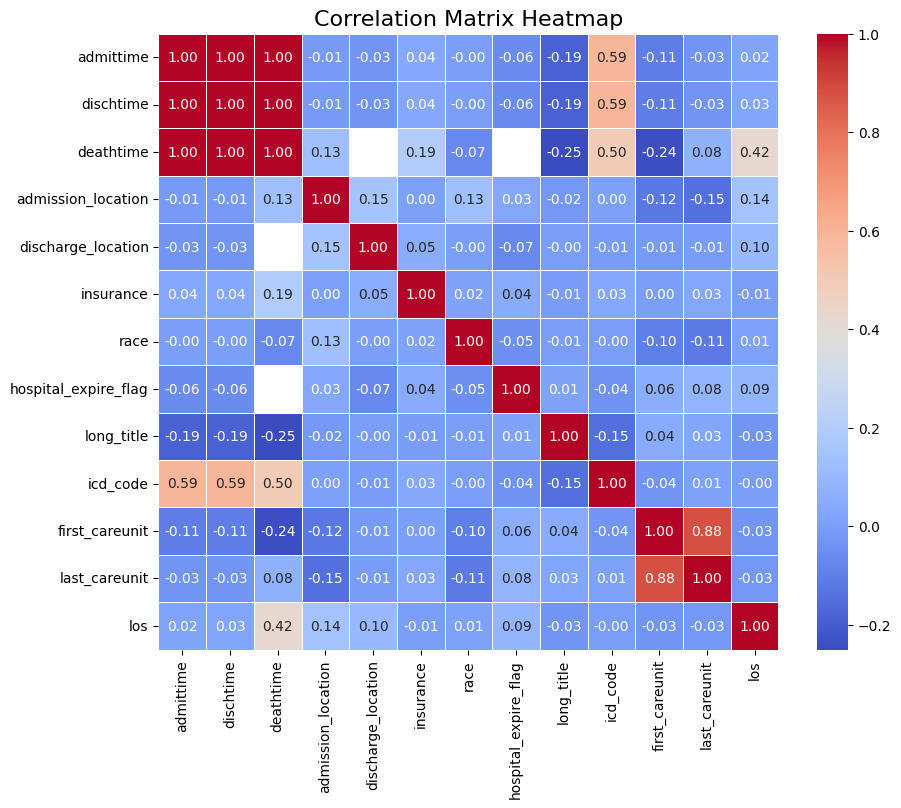

In [27]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Display the heatmap
plt.show()

#### To improve the accuracy of our model, we want to delete the highly correlated features from the dataframe.

In [28]:
# Set a threshold for removing highly correlated variables
threshold = 0.9

# Create a boolean mask for the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find index pairs of highly correlated variables
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop the highly correlated columns from the DataFrame
df_reduced = df.drop(columns=to_drop)

# Display the columns that were dropped
print(f"Dropped columns: {to_drop}")

Dropped columns: ['dischtime', 'deathtime']


In [29]:
df = df_reduced

In [30]:
df

,admittime,admission_location,discharge_location,insurance,race,hospital_expire_flag,long_title,icd_code,first_careunit,last_careunit,los
0,1597469340,3,4,39,5,1,1167,2426,22,22,54.989700
4,1478750040,3,6,44,0,1,725,890,17,17,1.442303
7,1456518060,3,6,27,3,0,585,1071,13,13,1.093113
17,1586110980,10,6,27,3,0,1162,2423,4,4,0.887998
18,1433878980,3,6,27,0,1,821,809,25,25,2.649630
...,...,...,...,...,...,...,...,...,...,...,...
56322,1606997460,3,4,5,3,1,1119,1535,4,4,9.879363
56331,1570143840,3,6,20,3,0,454,2275,10,10,3.509583
56352,1517937060,3,8,27,3,1,673,1963,17,17,2.455602
56364,1449127500,3,6,20,3,0,394,1806,9,9,1.007222


## Split Data into Features and Target

#### We are splitting the subset data into features and target.

In [31]:
X = df.drop('first_careunit', axis=1)
y = df['first_careunit']

### After removing highly correlated features, we want apply standard scaling to the remaining features.

In [32]:
#Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
#Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [34]:
#Build and Train  Model
# Create the XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
model.fit(X_train, y_train)

/home/jupyter-atika/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:13:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [35]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9410


## Feature Importance

We want to see which features are most important and which are not. If we find a feature is not much important in predicting the los, we will remove it.

In [39]:
# Get feature importance scores
importance_scores = model.get_booster().get_score(importance_type='weight')

# Convert the scores to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance_scores.values()
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importance_df)


                Feature  Importance
0                   los      4590.0
1             admittime      4447.0
2         last_careunit      3740.0
3              icd_code      3720.0
4             insurance      1748.0
5            long_title      1517.0
6    discharge_location      1183.0
7    admission_location       806.0
8                  race       747.0
9  hospital_expire_flag       433.0


### We can remove less important features from the dataframe.

In [40]:
X = df.drop(['hospital_expire_flag', 'admission_location', 'race', 'first_careunit'], axis=1)
y = df['first_careunit']

In [41]:
#Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
#Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [43]:
#Build and Train  Model
# Create the XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
model.fit(X_train, y_train)

/home/jupyter-atika/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:17:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [44]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9400


## Check the classification report

In [47]:
from sklearn.metrics import classification_report

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       139
           1       0.93      0.89      0.91       114
           2       1.00      0.95      0.98        65
           3       0.96      0.97      0.97       145
           4       0.99      0.97      0.98       189
           5       0.96      0.96      0.96        71
           6       0.55      0.75      0.63         8
           7       0.96      0.93      0.94        54
           8       0.96      0.91      0.94        58
           9       0.97      1.00      0.99       169
          10       0.98      0.99      0.98        96
          11       0.92      0.96      0.94       146
          12       0.00      0.00      0.00         1
          13       0.87      0.89      0.88        76
          14       1.00      0.99      1.00       119
          15       0.97      0.93      0.95       198
          16       0.86      0.80      0.83        93
          17       0.89    

/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Further, we can look into Overfitting. It occurs when a model fits the training data too closely, capturing noise rather than patterns, leading to poor performance on new data. It can be caused by complex models, small datasets, or noisy data. 

To prevent it, we can simplify the model and apply cross-validation. For XGBoost Classifier, adjusting hyperparameters and using cross-validation are effective strategies.

In [50]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [51]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [52]:
grid_search.fit(X_train, y_train)

/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
216 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jupyter-atika/.local/lib/python3.10/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/home/jupyter-atika/.local/lib/python3.10/site-packages/xgboost/sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [54]:
print("Best Parameters:", grid_search.best_params_)
#print("Best Score:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


### Now let's train the best model from Grid Search and see the score.

In [55]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = best_model.score(X_test, y_test)
print("Test Score with Best Model:", test_score)

/home/jupyter-atika/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:23:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Score with Best Model: 0.9476841052982339


In [56]:
y_pred=best_model.predict(X_test)

In [57]:
# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       139
           1       0.90      0.91      0.91       114
           2       1.00      0.95      0.98        65
           3       0.96      0.97      0.97       145
           4       0.99      0.97      0.98       189
           5       0.96      0.96      0.96        71
           6       1.00      0.62      0.77         8
           7       0.96      0.94      0.95        54
           8       0.96      0.91      0.94        58
           9       0.97      1.00      0.99       169
          10       0.98      0.99      0.98        96
          11       0.90      1.00      0.95       146
          12       0.00      0.00      0.00         1
          13       0.91      0.88      0.89        76
          14       1.00      0.99      1.00       119
          15       0.98      0.94      0.96       198
          16       0.90      0.84      0.87        93
          17       0.96    

/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Task: Plot the AUC 

Can you plot the AUC curves for the model you just trained?